In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("sales_data_sample.csv",encoding='ISO-8859-1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINENUMBER   2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   STATUS            2823 non-null   int32         
 6   QTR_ID            2823 non-null   int64         
 7   MONTH_ID          2823 non-null   int64         
 8   YEAR_ID           2823 non-null   int64         
 9   PRODUCTLINE       2823 non-null   object        
 10  MSRP              2823 non-null   int64         
 11  PRODUCTCODE       2823 non-null   int64         
 12  CUSTOMERNAME      2823 non-null   int64         
 13  PHONE             2823 non-null   int64         
 14  ADDRESSLINE1      2823 n

In [49]:
df["PHONE"].nunique()

91

In [53]:
df.isnull().sum()

QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
POSTALCODE          0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
DAY                 0
WEEKDAY             0
dtype: int64

In [44]:
df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE',
       'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'DAY', 'WEEKDAY'],
      dtype='object')

In [55]:
df['POSTALCODE'].value_counts()
df['POSTALCODE'] = df['POSTALCODE'].astype('string')

In [41]:
df['POSTALCODE'] = df['POSTALCODE'].fillna(28034)

In [20]:
df.drop(labels=['ORDERNUMBER','ADDRESSLINE2','STATE','TERRITORY'],axis=1,inplace=True)

In [21]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [23]:
df['DAY'] = df['ORDERDATE'].apply(lambda x:x.day)

In [29]:
import calendar

df['WEEKDAY'] = df['ORDERDATE'].apply(lambda x: calendar.day_name[x.weekday()])

In [56]:
le = LabelEncoder()

def encodefunc(feature):
    df[feature] = le.fit_transform(df[feature])

lis = ['PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'WEEKDAY','STATUS']


for i in lis:
    encodefunc(i)

In [64]:
encodefunc('PRODUCTLINE')

In [65]:
data = df.drop('ORDERDATE',axis=1)

In [66]:
inertia =[]

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(data)
    inertia.append(km.inertia_)


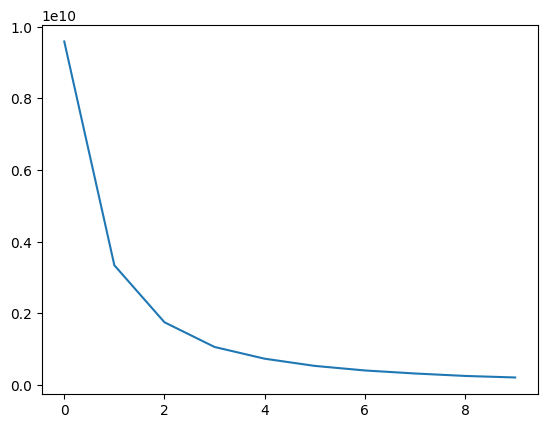

In [67]:
import matplotlib.pyplot as plt

plt.plot(inertia)